In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgbc
import seaborn as sborn
import matplotlib.pyplot as pt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [59]:
#Load Churn dataset
dataset_path = "Churn_Modelling.csv"
churn_data = pd.read_csv(dataset_path)

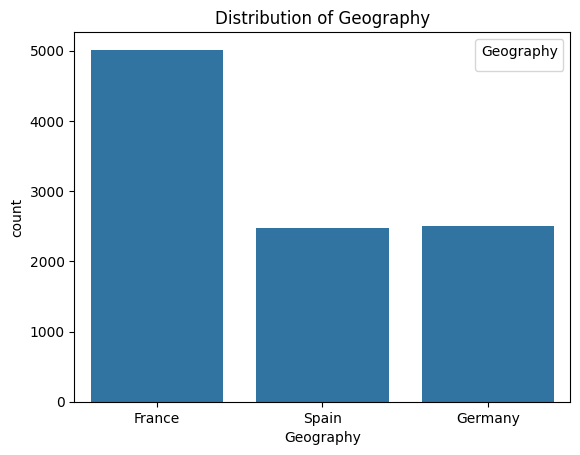

In [60]:
# Ploting Bar graph 'Geography' distribution
sborn.countplot(x='Geography', data=churn_data)
pt.title('Distribution of Geography')
pt.legend(title='Geography')
pt.show()

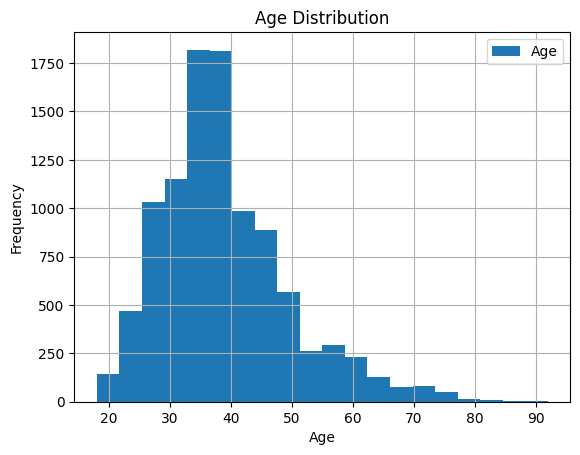

In [61]:
# Histogram for 'Age' distribution
churn_data['Age'].hist(bins=20)
pt.title('Age Distribution')
pt.xlabel('Age')
pt.ylabel('Frequency')
pt.legend(['Age'])
pt.show()

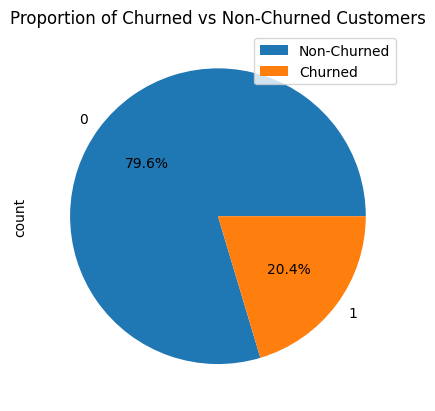

In [62]:
# Proportion of churned vs. non-churned customers
churn_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%', legend=True)
pt.title('Proportion of Churned vs Non-Churned Customers')
pt.legend(['Non-Churned', 'Churned'])
pt.show()

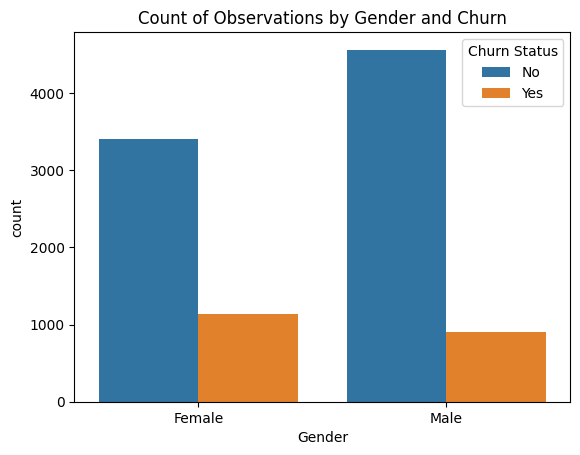

In [63]:
# Example count plot of 'Gender' split by churn
sborn.countplot(x='Gender', hue='Exited', data=churn_data)
pt.title('Count of Observations by Gender and Churn')
pt.legend(title='Churn Status', labels=['No', 'Yes'])
pt.show()

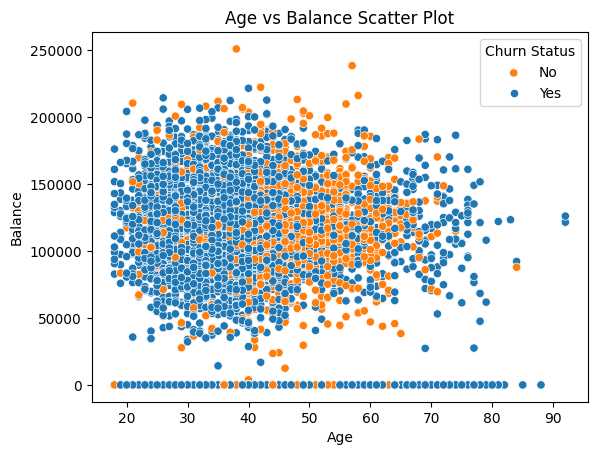

In [64]:
# Example relationship between 'Age' and 'Balance' colored by churn
sborn.scatterplot(x='Age', y='Balance', hue='Exited', data=churn_data)
pt.title('Age vs Balance Scatter Plot')
pt.legend(title='Churn Status', labels=['No', 'Yes'])
pt.show()

In [65]:
 # Pairwise relationships in a dataset
sborn.pairplot(churn_data, hue='Exited')
pt.title('Pair Plot of Features')
pt.show()  # Legend automatically included with 'hue'


Output hidden; open in https://colab.research.google.com to view.

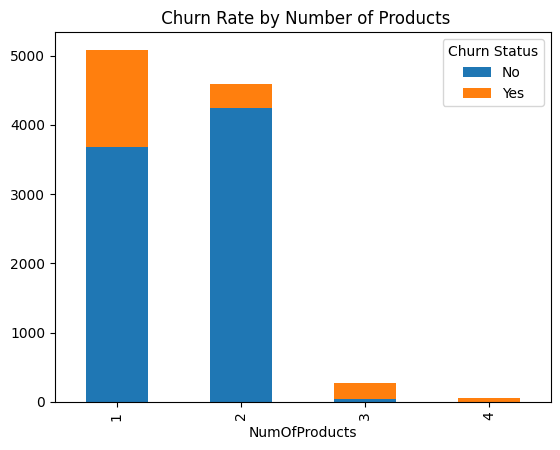

In [66]:
# Stacked bar chart example for 'NumOfProducts' and churn
pd.crosstab(churn_data['NumOfProducts'], churn_data['Exited']).plot(kind='bar', stacked=True)
pt.title(' Churn Rate by Number of Products')
pt.legend(title='Churn Status', labels=['No', 'Yes'])
pt.show()

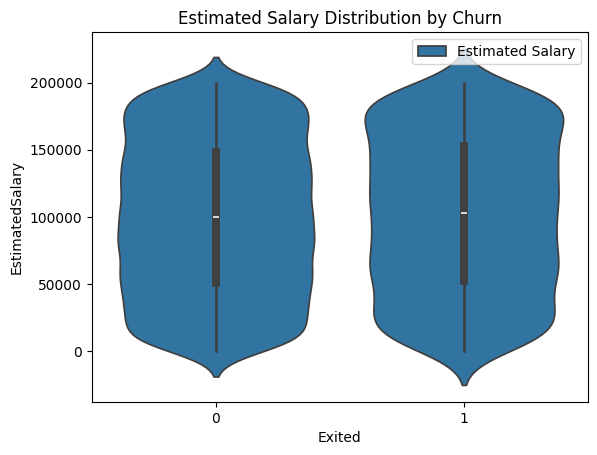

In [67]:
 # Example for 'EstimatedSalary'
sborn.violinplot(y='EstimatedSalary', x='Exited', data=churn_data)
pt.title('Estimated Salary Distribution by Churn')
pt.legend(['Estimated Salary'])
pt.show()


In [68]:
# Preprocessing
churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

X = churn_data.drop('Exited', axis=1)
y = churn_data['Exited']

cf = ['Geography', 'Gender']
nf = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
nf.remove('HasCrCard')  # HasCrCard is binary

preprocesing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), nf),
        ('cat', OneHotEncoder(drop='first'), cf)
    ])

X_processed_data= preprocesing .fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed_data, y, test_size=0.2, random_state=0)

In [69]:
# Initialize the Support Vector Classifier
svm = SVC(kernel='rbf', random_state=0)
# Fit the model to the training data
svm.fit(X_train, y_train)
# Predict on the Test set
y_pred= svm.predict(X_test)

In [70]:
#Performance Evaluation
cmatrix = confusion_matrix(y_test, y_pred)
report= classification_report(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)





print("Confusion Matrix\n", cmatrix)
print("\nClassification Report\n", report)
print("\nAccuracy", accuracy)

Confusion Matrix
 [[1563   32]
 [ 226  179]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.85      0.44      0.58       405

    accuracy                           0.87      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.87      0.87      0.85      2000


Accuracy 0.871


In [71]:

model= LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [72]:
# Performance Evaluation
cmatrix = confusion_matrix(y_test, y_pred)
report= classification_report(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)





# results
print("Confusion Matrix\n", cmatrix)
print("\nClassification Report\n", report)
print("\nAccuracy", accuracy)

Confusion Matrix
 [[1525   70]
 [ 309   96]]

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.70      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000


Accuracy 0.8105


In [73]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [74]:
# Performance Evaluation
cmatrix = confusion_matrix(y_test, y_pred)
report= classification_report(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)





# results
print("Confusion Matrix\n", cmatrix)
print("\nClassification Report\n", report)
print("\nAccuracy", accuracy)

Confusion Matrix
 [[1523   72]
 [ 198  207]]

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.74      0.51      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000


Accuracy 0.865


In [75]:

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# Fit the model
gbc.fit(X_train, y_train)
# Predicion
y_pred= gbc.predict(X_test)


In [76]:
# Performance Evaluation
cmatrix = confusion_matrix(y_test, y_pred)
report= classification_report(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)





print("Confusion Matrix\n", cmatrix)
print("\nClassification Report\n", report)
print("\nAccuracy", accuracy)

Confusion Matrix
 [[1506   89]
 [ 190  215]]

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000


Accuracy 0.8605


In [77]:

xgbc_model = xgbc.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgbc_model.fit(X_train, y_train)
y_pred= xgbc_model.predict(X_test)

In [78]:
# Performance Evaluation
cmatrix = confusion_matrix(y_test, y_pred)
report= classification_report(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)





print("Confusion Matrix\n", cmatrix)
print("\nClassification Report\n", report)
print("\nAccuracy", accuracy)

Confusion Matrix
 [[1495  100]
 [ 194  211]]

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.68      0.52      0.59       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000


Accuracy 0.853
